In [1]:
# importing various modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the file
df=pd.read_csv('Automobile_data.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
# normalized-losses, bore, stroke, horsepower, peak-rpm, price

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
l1=['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
# this is list of columns having numerical data but data type is object. It must be converted to float.


In [5]:
# checking how many 'missing'/'?'/'#' values are there is columns specified in l1 list. Based on the values, their 
# percentages will be calculated. If percentage is between 0-3, the rows will be dropped. If percentage is between 3-50 
# the missing data will be replaced by median.
for i in l1:
    print(df[i].value_counts(),'\n')
# there is '?' instead of NaN values in all columns specified in l1.

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64 

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.5      2
3.8      2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.6      1
2.92     1
3.76     1
2.68     1
2.99     1
Name: bore,

In [6]:
# replacing '?' with NaN values for columns in l1.
for i in l1:
    df[i]=df[i].replace('?',np.NaN)

In [7]:
for i in l1:
    df[i]=df[i].astype(float)

In [8]:
# filling NaN values with median.
# percentage of ? in 'normalized-losses' is 20%, hence they will be filled with median. 


In [9]:
l2=['bore','stroke','horsepower','peak-rpm','price'] 
'''percentage of ? in l2 columns is less than 3% hence rows corresponding to ? will be dropped. '''

'percentage of ? in l2 columns is less than 3% hence rows corresponding to ? will be dropped. '

In [10]:
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace=True)

In [11]:
df.dropna(how='any',subset=None,inplace=True) # NaN values are dropped for columns in l2.

In [12]:
# checking if there are missing values in columns with object data type and columns other than those mentioned in l1.
for i in df:
    if i not in l1:
        print(df[i].value_counts(),'\n')

 0    64
 1    52
 2    31
 3    23
-1    22
-2     3
Name: symboling, dtype: int64 

toyota           32
nissan           18
honda            13
mazda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64 

gas       175
diesel     20
Name: fuel-type, dtype: int64 

std      159
turbo     36
Name: aspiration, dtype: int64 

four    112
two      81
?         2
Name: num-of-doors, dtype: int64 

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64 

fwd    116
rwd     71
4wd      8
Name: drive-wheels, dtype: int64 

front    192
rear       3
Name: engine-location, dtype: int64 

93.7     20
94.5     1

In [13]:
# only 'num-of-doors' has 2 '?'. It is less than 3% hence it will be dropped.
row=df[df['num-of-doors']=='?'].index
df.drop(row,axis=0,inplace=True)

In [14]:
'''In num-of-cylinders rather than using nos. their spelling is used. The spelling is replaced here by the nos.'''
noclist=['two','three','four','five','six','eight','twelve']
l4=[2,3,4,5,6,8,12]
noctup=tuple(zip(l4,noclist))
for (i,j) in noctup:
    df['num-of-cylinders'].replace(j,i,inplace=True)

In [15]:
''' No. of doors are in terms of words. They are replaced with nos. '''
df['num-of-doors'].replace('two',2,inplace=True)
df['num-of-doors'].replace('four',4,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    float64
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num-of-doors       193 non-null    int64  
 6   body-style         193 non-null    object 
 7   drive-wheels       193 non-null    object 
 8   engine-location    193 non-null    object 
 9   wheel-base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13  curb-weight        193 non-null    int64  
 14  engine-type        193 non-null    object 
 15  num-of-cylinders   193 non-null    int64  
 16  engine-size        193 non

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


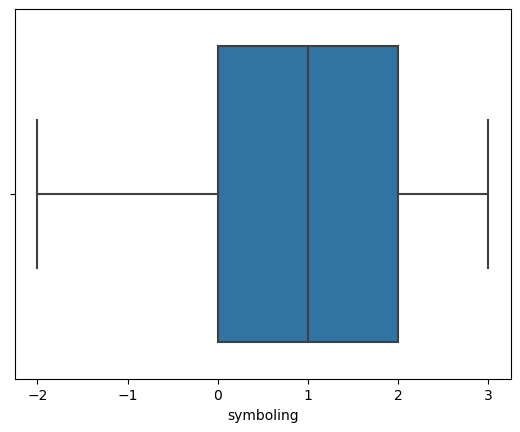

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


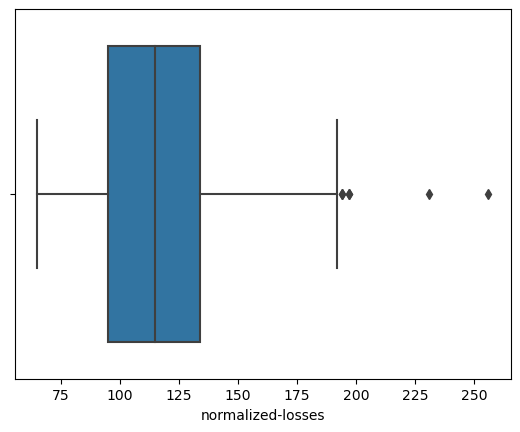

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


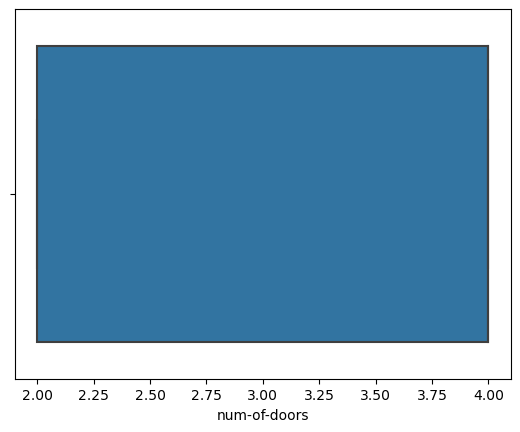

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


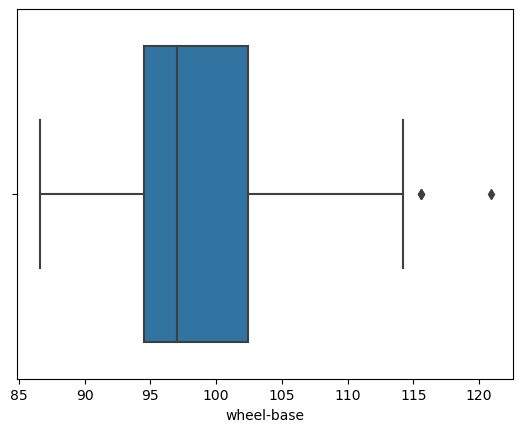

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


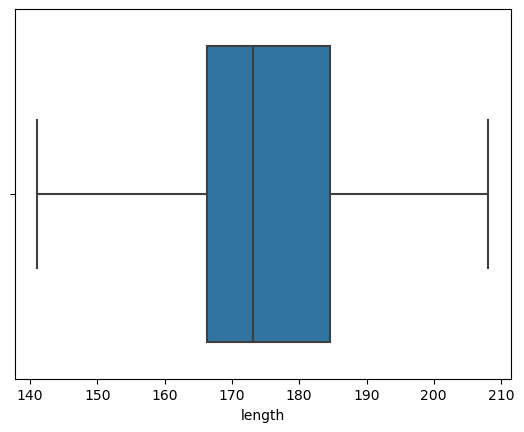

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


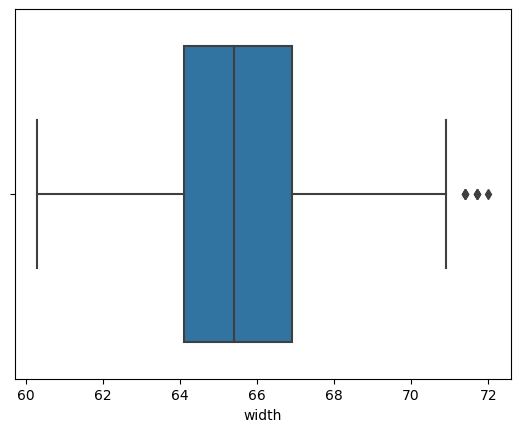

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


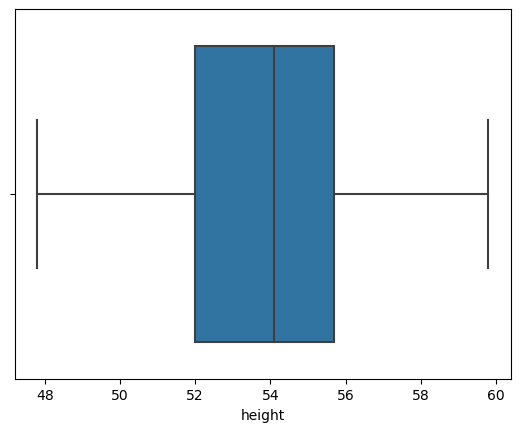

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


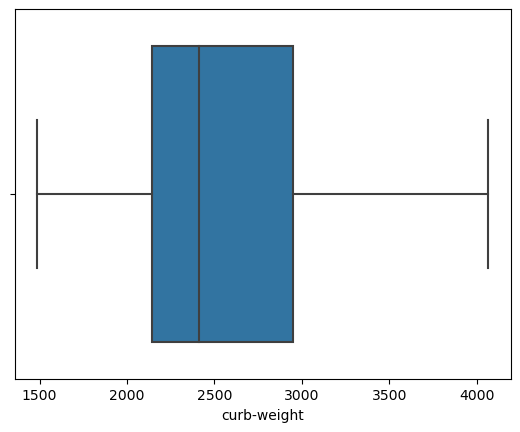

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


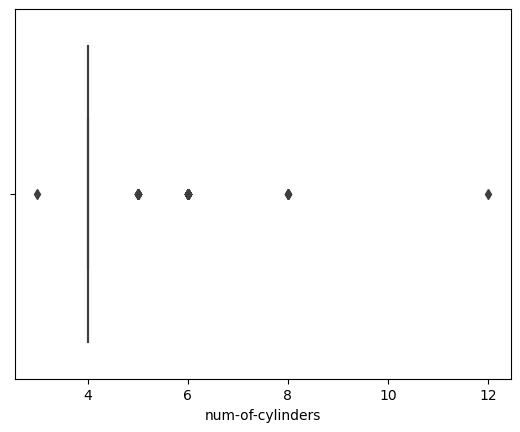

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


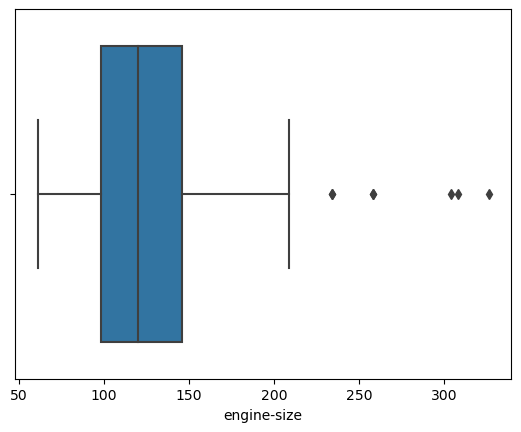

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


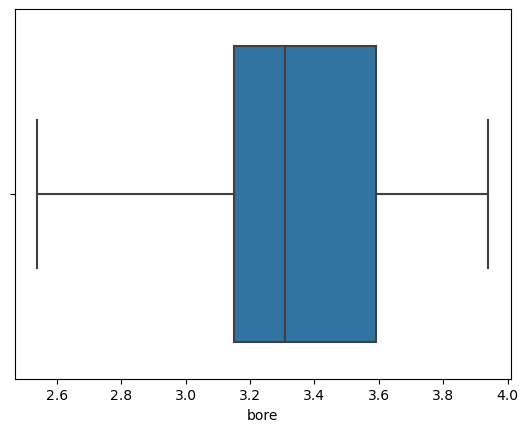

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


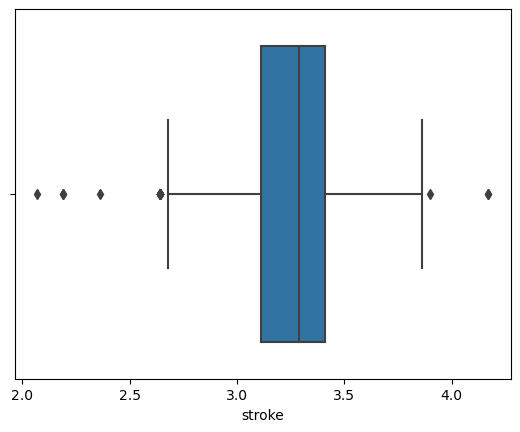

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


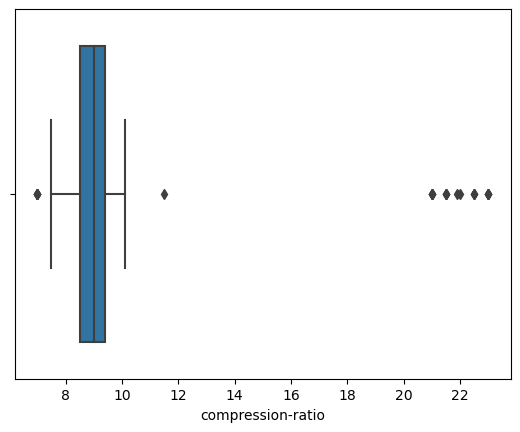

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


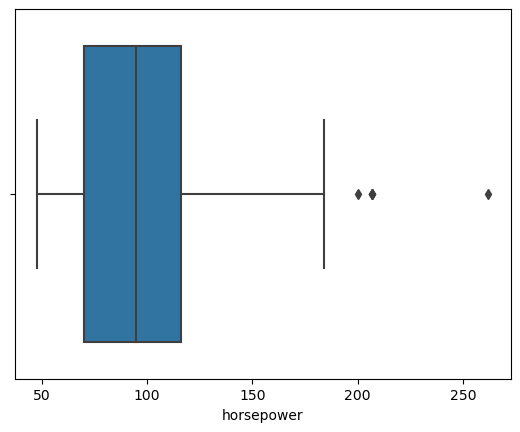

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


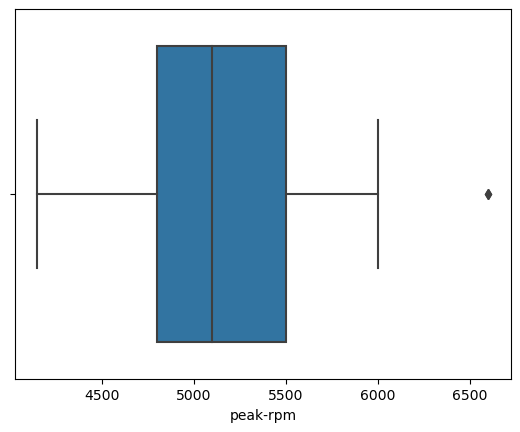

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


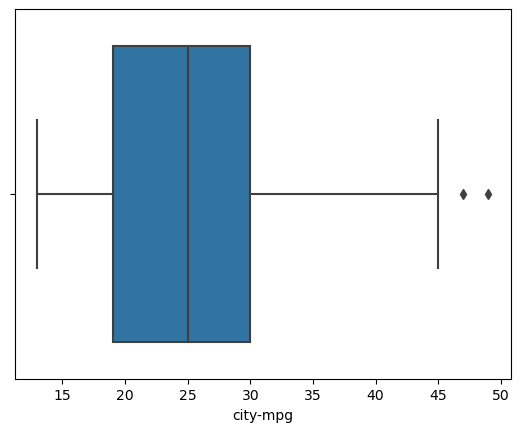

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


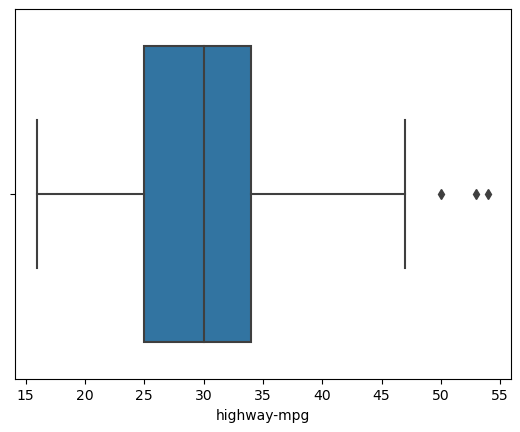

C:\Users\VISHWAJEET YADAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


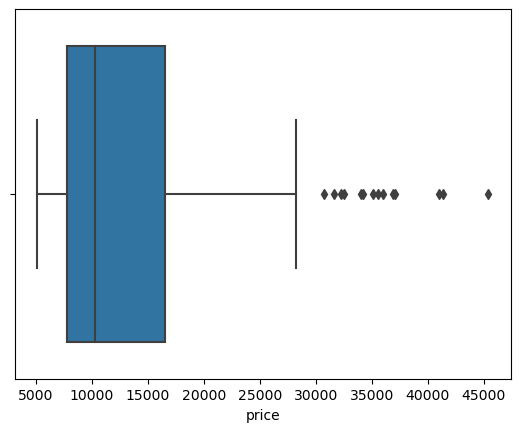

In [16]:
# handling outliers
'''creating a list of columns with int/float data type.'''
l5=df.select_dtypes(include=['int64','float64']).columns
for i in l5:
    sns.boxplot(df[i])
    plt.show()

In [17]:
# removing outliers for normalized-losses
q1=np.percentile(df['normalized-losses'] ,25)
q3=np.percentile(df['normalized-losses'] ,75)
iqr=q3-q1
hq=q3+(1.5*iqr)
df=df[df['normalized-losses']<=hq]

In [18]:
# removing outliers for wheel-base
df=df[df['wheel-base']<=115] # upper limit value directly taken from outlier.

In [19]:
# removing outliers for width
df=df[df['width']<=71]   # upper limit value directly taken from outlier.

In [20]:
# removing outliers for engine-size
q1=np.percentile(df['engine-size'] ,25)
q3=np.percentile(df['engine-size'] ,75)
iqr=q3-q1
hq=q3+(1.5*iqr)
df=df[df['engine-size']<=hq]

In [21]:
# removing outliers for stroke
q1=np.percentile(df['stroke'] ,25)
q3=np.percentile(df['stroke'] ,75)
iqr=q3-q1
hq=q3+(1.5*iqr)
lq=q1-(1.5*iqr)
df=df[(df['stroke']<=hq) & (df['stroke']>=lq)]

In [22]:
# removing outliers for horsepower
q1=np.percentile(df['horsepower'] ,25)
q3=np.percentile(df['horsepower'] ,75)
iqr=q3-q1
hq=q3+(1.5*iqr)
df=df[df['horsepower']<=hq]

In [23]:
# removing outliers for peak-rpm
df=df[df['peak-rpm']<=6000]  # upper limit value directly taken from outlier.

# removing outliers for city-mpg
df=df[df['city-mpg']<=45]  # upper limit value directly taken from outlier.

# removing outliers for highway-mpg
df=df[df['highway-mpg']<=48]   # upper limit value directly taken from outlier.

# removing outliers for price
q1=np.percentile(df['price'] ,25)
q3=np.percentile(df['price'] ,75)
iqr=q3-q1
hq=q3+(1.5*iqr)
df=df[df['price']<=hq]

In [24]:
# standardization

l6=['curb-weight','engine-size','city-mpg','highway-mpg']
''' above columns have int data type but are continous in nature.'''
l7=df.select_dtypes('float64')
'''l7 columns are also continous in nature. Hence we can apply standardization on them.'''
l6.extend(l7)
l6.remove('price') # there is no need to standardize target variable.
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in l6:
    df[i]=ss.fit_transform(np.array(df[i]).reshape(-1,1)) 
'''we have to provide 2D array in fit_transform. reshape(-1,1) will convert 1D array to 2D array with 1 column and 
multiple rows.'''

'we have to provide 2D array in fit_transform. reshape(-1,1) will convert 1D array to 2D array with 1 column and \nmultiple rows.'

In [25]:
# converting categorical data to numerical data. here one hot encoding is used as all categorical data present is nominal.
catcols=df.select_dtypes('object')  
'''it will return new dataframe containing only object columns'''
newcols=df.select_dtypes('object').columns # it will return column names of catcols
df2=pd.get_dummies(catcols)  # data conversion to numerical using one hot encoding.
df=pd.concat([df,df2],axis=1)  # the dataframe is joined with original dataframe.
df.drop(newcols, axis=1,inplace=True)  # we don't need original categorical columns now, hence they're dropped.

In [26]:
# prediction of price
y=df.loc[:,'price']
x=df.drop('price',axis=1)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print(lr.score(xtrain,ytrain),lr.score(xtest,ytest))
# training score = 0.9460992326595341
# testing score = 0.9068100674018501 

0.9460992326595341 0.9068100674018501


In [27]:
# using Ridge regularization as there are lot of parameters.
from sklearn.linear_model import Ridge,Lasso
r=Lasso(alpha=2)
r.fit(xtrain,ytrain)
print(r.score(xtrain,ytrain),r.score(xtest,ytest))
# for Lasso, aplha=2, testing accuracy increased slightly.
# training score = 0.9443606728755657
# testing score = 0.9088177423502111

0.9443606728755657 0.9088177423502111
